<a href="https://colab.research.google.com/github/nsriniva/DS-Unit-1-Build/blob/master/DS_Unit_1_BuildProject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import isclose
import zipfile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Uploaded 
# https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip 
# to Google Drive from 
# https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

# Extract data file from archive and load into dataframe
# The xip archive contains the data file 
# OnlineNewsPopularity/OnlineNewsPopularity.csv 
# and the info file 
# OnlineNewsPopularity/OnlineNewsPopularity.names.
# My Google Drive is mounted at /content/drive/My Drive
zfile = '/content/drive/My Drive/OnlineNewsPopularity.zip'
# Use the zipfile package to open the archive and read the data file
with zipfile.ZipFile(zfile) as zf:
  with zf.open('OnlineNewsPopularity/OnlineNewsPopularity.csv') as f:
    onp_df = pd.read_csv(f)

In [ ]:
display(onp_df.shape)

display(onp_df.head())

display(list(onp_df.columns))

display(onp_df.dtypes)

display(onp_df.isna().sum())

column_names = (x.strip() for x in onp_df.columns)

onp_df.columns = list(column_names)

display(onp_df.head())

display(list(onp_df.columns))

(39644, 61)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


['url',
 ' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

In [ ]:

#data_channel_columns = list(filter(lambda x: print(f'#{x}#', x.strip().startswith('data_channel_is_')), onp_df.columns))

data_channel_columns = list(filter(lambda x: x.startswith('data_channel_is_'), onp_df.columns))

weekday_columns = list(filter(lambda x: x.startswith('weekday_is_'), onp_df.columns))


display(data_channel_columns)
display(weekday_columns)

['data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world']

['weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday']

In [ ]:
dcm = {}
wm = {}

prel = len('data_channel_is_')
for idx,name in enumerate(data_channel_columns):
  dcm[name[prel:]] = idx+1

prel = len('weekday_is_')
for idx,name in enumerate(weekday_columns):
  wm[name[prel:]] = idx+1

display(dcm)
display(wm)

mf = lambda u,args: [0,args][int(u)]

def mapper_func(df, new_col, name_dict):

  name_list = list(name_dict.items())

  first = name_list[0]

  df[new_col] = df[new_col+'_is_'+first[0]].apply(mf, args=(name_dict[first[0]],))

  for name,_ in name_list[1:]:
    df[new_col] = df[new_col] + df[new_col+'_is_'+name].apply(mf, args=(name_dict[name],))

  return df.drop(columns=[ new_col+'_is_'+name for name,_ in name_list])

'''
onp_df['data_channel'] = onp_df.data_channel_is_bus.apply(mf, args=(dcm['bus'], )) + \
  onp_df.data_channel_is_entertainment.apply(mf, args=(dcm['entertainment'], )) + \
  onp_df.data_channel_is_lifestyle.apply(mf, args=(dcm['lifestyle'],))  + \
  onp_df.data_channel_is_socmed.apply(mf, args=(dcm['socmed'],)) + \
  onp_df.data_channel_is_tech.apply(mf, args=(dcm['tech'],)) + \
  onp_df.data_channel_is_world.apply(mf, args=(dcm['world'],))
'''

onp_df = mapper_func(onp_df, 'data_channel', dcm)

onp_df = mapper_func(onp_df, 'weekday', wm)

onp_df = onp_df.drop(columns=['is_weekend'])

display(onp_df.head(), onp_df.shape)

# Remove both non-predictive attributes
onp_df_predictive = onp_df.drop(columns=['url', 'timedelta'])

# Drop the target/goal attribute
onp_df_predictive = onp_df_predictive.drop(columns=['shares'])

display(onp_df_predictive.head(), onp_df_predictive.shape)

{'bus': 3,
 'entertainment': 2,
 'lifestyle': 1,
 'socmed': 4,
 'tech': 5,
 'world': 6}

{'friday': 5,
 'monday': 1,
 'saturday': 6,
 'sunday': 7,
 'thursday': 4,
 'tuesday': 2,
 'wednesday': 3}

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2,1
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,3,1
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,3,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2,1
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,5,1


(39644, 49)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,2,1
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,3,1
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,3,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,2,1
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,5,1


(39644, 46)

In [ ]:
display(onp_df.data_channel.value_counts())
display(onp_df.weekday.value_counts())


6    8427
5    7346
2    7057
3    6258
0    6134
4    2323
1    2099
Name: data_channel, dtype: int64

3    7435
2    7390
4    7267
1    6661
5    5701
7    2737
6    2453
Name: weekday, dtype: int64

In [ ]:
#Let's try some linear regression

X = onp_df_predictive.values

#display(X)

Y = onp_df.shares.values.reshape(-1,1)

#display(Y)

# Calculate Beta Values
beta = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, Y))

#display(beta)

Yc = np.matmul(X, beta)

#display(Yc)

display(np.linalg.norm(Y-Yc))

2287397.382196057

In [ ]:
def compute_clusters(idf, K):

  kmeans = {}
  for k in K:
    kmeans[k] = KMeans(k)
    kmeans[k] = kmeans[k].fit(idf)
  
  for k in K:
      idf.loc[:, f'clusters{k}'] = kmeans[k].labels_
  return kmeans
# We're going to be comparing our results
# against 2 label values B/M, so K is just 2.
K = range(2,32)

kmeans = compute_clusters(onp_df_predictive, K)

display(onp_df_predictive.head(), onp_df_predictive.shape, onp_df_predictive.clusters2.value_counts())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,clusters2,clusters3,clusters4,clusters5,clusters6,clusters7,clusters8,clusters9,clusters10,clusters11,clusters12,clusters13,clusters14,clusters15,clusters16,clusters17,clusters18,clusters19,clusters20,clusters21,clusters22,clusters23,clusters24,clusters25,clusters26,clusters27,clusters28,clusters29,clusters30,clusters31
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,2,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,3,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,3,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,2,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,5,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1


(39644, 76)

1    36458
0     3186
Name: clusters2, dtype: int64

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,data_channel,weekday,clusters2,clusters3,clusters4,clusters5,clusters6,clusters7,clusters8,clusters9,clusters10,clusters11,clusters12,clusters13,clusters14,clusters15,clusters16,clusters17,clusters18,clusters19,clusters20,clusters21,clusters22,clusters23,clusters24,clusters25,clusters26,clusters27,clusters28,clusters29,clusters30,clusters31
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,2,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,3,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,3,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,2,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,5,1,0,2,0,1,2,0,2,2,1,1,0,1,2,1,2,3,1,1,1,1,1,1,0,1,1,1,1,1,1,1


(39644, 76)

1    36458
0     3186
Name: clusters2, dtype: int64

1    25937
0    10521
2     3186
Name: clusters3, dtype: int64

1    22049
2     8644
3     5766
0     3185
Name: clusters4, dtype: int64

0    21466
2     9046
4     5720
1     3185
3      227
Name: clusters5, dtype: int64

1    14645
5    11356
4     5590
0     4643
2     3185
3      225
Name: clusters6, dtype: int64

1    14615
2    11338
3     5578
6     4590
0     3185
4      224
5      114
Name: clusters7, dtype: int64

3    11199
6    10544
4     6090
1     5587
2     3185
0     2701
5      224
7      114
Name: clusters8, dtype: int64

1    11209
6    10539
5     5633
3     4460
2     3185
0     2629
8     1651
4      224
7      114
Name: clusters9, dtype: int64

3    11224
2    10543
4     5617
0     4462
1     3185
6     2624
7     1653
5      224
8       87
9       25
Name: clusters10, dtype: int64

2     8928
6     7457
10    6664
3     4642
4     4462
1     3185
8     2316
9     1654
5      224
0       87
7       25
Name: clusters11, dtype: int64

1     8566
5     7142
11    6866
8     4690
2     4457
0     3185
3     2121
7     1652
9      629
4      224
6       87
10      25
Name: clusters12, dtype: int64

12    8569
2     7139
9     6873
0     4689
7     3555
1     3185
8     2052
3     1869
10     752
4      625
6      224
5       87
11      25
Name: clusters13, dtype: int64

3     8533
9     7147
10    6710
1     4585
0     3555
2     3185
5     2015
11    1868
7      752
12     624
6      334
4      224
8       87
13      25
Name: clusters14, dtype: int64

0     8155
14    6846
4     6656
2     4053
12    3552
1     3185
10    2253
5     1871
7     1173
11     752
13     486
9      326
3      224
6       87
8       25
Name: clusters15, dtype: int64

3     8157
8     6873
9     6625
15    4036
2     3185
1     2268
0     2197
10    1655
12    1646
6     1168
14     682
11     487
13     329
4      224
7       87
5       25
Name: clusters16, dtype: int64

10    6405
2     5951
13    5129
9     4702
7     3689
3     3185
0     2191
5     2126
6     1657
11    1645
1     1136
16     686
12     486
15     320
4      224
8       87
14      25
Name: clusters17, dtype: int64

14    6422
5     5966
13    4998
0     4865
2     3539
1     3185
9     2189
17    2007
3     1659
15    1639
10    1119
11     688
8      424
12     319
16     289
4      224
7       87
6       25
Name: clusters18, dtype: int64

12    6375
5     5889
11    4989
2     4805
3     3669
1     3185
6     2190
10    2090
9     1664
14    1639
8     1109
0      686
15     483
18     442
4      167
16      94
7       86
17      57
13      25
Name: clusters19, dtype: int64

12    6376
11    5862
2     4971
0     4803
8     3350
1     3100
9     2190
14    2034
5     1662
18    1639
10    1106
13     687
16     556
3      387
19     312
4      223
17     189
7       87
15      85
6       25
Name: clusters20, dtype: int64

0     5083
11    4822
16    4661
20    4532
2     3502
1     3185
9     3016
15    1989
4     1972
13    1511
8     1422
5     1089
19     923
17     441
14     423
10     360
12     287
3      224
18      91
6       86
7       25
Name: clusters21, dtype: int64

10    5089
0     4840
15    4637
8     4477
21    3406
1     3100
5     2936
3     2190
2     2025
6     1664
11    1639
17    1052
9      685
16     477
13     473
18     438
4      167
19      96
7       86
20      85
14      57
12      25
Name: clusters22, dtype: int64

11    6322
3     5770
20    4955
0     4780
8     3416
1     3100
2     2011
14    1797
7     1314
16    1304
19    1154
18     903
4      662
10     464
17     441
15     381
12     358
13     167
22      92
6       86
21      85
5       57
9       25
Name: clusters23, dtype: int64

23    5098
1     4930
20    4578
6     4576
22    3415
0     3100
16    2778
8     2024
2     1797
11    1314
17    1155
19    1048
10     900
15     664
5      477
3      472
13     436
12     358
4      222
18     103
21      85
14      45
9       44
7       25
Name: clusters24, dtype: int64

3     6172
18    5760
0     4866
13    4572
10    3185
1     3100
6     2025
16    1797
2     1313
21    1154
11    1037
7      902
22     701
20     663
19     496
8      392
17     381
14     359
15     264
5      167
9       86
23      85
4       85
24      57
12      25
Name: clusters25, dtype: int64

0     5003
9     4872
7     4469
17    4434
1     3100
2     2955
16    2718
22    1812
3     1797
19    1314
24    1298
13    1154
11     903
6      702
8      662
18     428
12     410
21     406
20     358
15     356
4      221
5       86
23      85
14      73
10      25
25       3
Name: clusters26, dtype: int64

5     6157
0     5834
11    4914
18    4452
23    3283
1     3100
2     2029
12    1366
26    1346
3     1225
15     952
25     790
19     662
13     599
20     515
10     509
8      381
6      374
16     290
24     199
14     167
21     162
7       86
22      85
17      85
4       57
9       25
Name: clusters27, dtype: int64

0     4948
27    4840
13    4466
10    4437
1     3100
18    3014
7     2851
4     1854
17    1370
8     1253
3     1240
11    1240
26     877
19     736
24     676
12     504
23     434
14     396
25     350
2      287
22     281
5      166
20      85
15      70
16      57
21      44
9       43
6       25
Name: clusters28, dtype: int64

0     4976
17    4830
16    4449
12    4368
1     3100
2     2783
6     2766
11    1797
27    1740
3     1314
5     1262
18    1154
8      903
14     727
26     662
24     548
28     434
23     371
13     365
15     358
10     224
21     128
7       86
19      85
22      59
20      57
4       39
25      34
9       25
Name: clusters29, dtype: int64

16    4914
5     4865
12    4365
15    4250
1     3100
0     2941
2     2667
19    1753
22    1351
13    1317
8     1249
10    1231
11     817
20     694
3      665
26     558
17     508
29     489
18     373
14     338
25     290
24     281
4      167
28     122
7       85
27      85
21      57
23      45
6       42
9       25
Name: clusters30, dtype: int64

15    4897
7     4811
29    4389
21    4312
1     3100
10    2807
0     2807
11    1717
3     1366
22    1340
17    1267
14    1225
9      792
28     670
25     662
30     549
2      525
18     509
16     388
6      372
8      291
13     230
4      128
20     122
24      85
19      76
23      57
26      43
5       43
27      39
12      25
Name: clusters31, dtype: int64

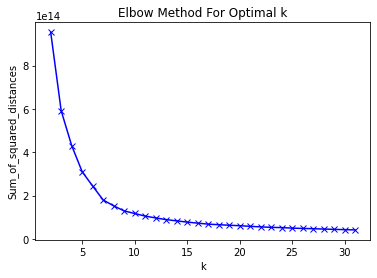

In [ ]:
display(onp_df_predictive.head(), onp_df_predictive.shape)

sum_of_squared_distances = []
for k in K:
  sum_of_squared_distances.append(kmeans[k].inertia_)
  display(onp_df_predictive[f'clusters{k}'].value_counts())

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# k=4 gives us 

In [ ]:
scaler = StandardScaler()

# Standardize the data
Z = scaler.fit_transform(onp_df_predictive)

# Create PCA instance
# We want all the principal components
# that provide a combined variance of
# >= 90%.
pca = PCA(n_components=0.9,svd_solver='full')

# New features data 
# Fit and transform in one go.

new_features = pca.fit_transform(Z)

cvar = np.cumsum(pca.explained_variance_ratio_)

display(cvar)

new_df = pd.DataFrame(new_features, columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))])

display(new_df.head())

array([0.11765523, 0.18112953, 0.23745468, 0.28782166, 0.33536937,
       0.37689203, 0.41731166, 0.45682072, 0.49405105, 0.52959586,
       0.56285051, 0.59427132, 0.62195149, 0.64901481, 0.67222672,
       0.69144195, 0.70902114, 0.72621216, 0.74229729, 0.75774526,
       0.77233297, 0.78607402, 0.79906609, 0.81113621, 0.82295194,
       0.83430764, 0.84491506, 0.85474462, 0.86412691, 0.87295461,
       0.88167508, 0.88974177, 0.89729361, 0.9046592 ])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,-7.560322,-0.199846,0.381634,-0.166737,0.548043,0.192680,0.687126,0.370585,-2.465595,-0.887972,-1.190158,-1.603298,-0.208399,1.103585,1.013288,-1.916661,0.093188,0.656079,-0.141720,-0.174139,-0.072526,2.044515,-0.476512,0.925360,-0.576845,-0.472218,0.952327,-0.396609,-0.780290,0.158937,0.025091,-0.587292,0.124449,-0.778728
1,-7.635705,1.675407,-0.028401,-1.688103,0.124630,0.481535,0.131889,0.364348,-2.132526,-0.797254,0.317835,-1.681937,-1.333141,-0.904499,1.728260,-1.000656,-1.094325,0.395706,0.332345,0.292536,-1.518355,0.905793,-1.231564,0.441913,-0.373922,-0.075310,0.079112,-0.393022,-0.123607,-0.696082,0.395506,0.177738,0.532263,-0.293556
2,-8.045621,-2.158429,0.577256,-1.190314,-0.864324,-0.314068,-0.117604,0.185982,-1.760863,-0.756140,0.259364,-1.705820,-1.981212,0.126400,0.192221,-0.493976,0.371485,0.002368,-0.932273,0.981435,0.566995,0.340664,-1.130369,-0.798657,-1.105795,0.048540,-0.840538,-1.088372,-0.564415,0.766504,0.136654,0.413559,-0.084628,-0.863836
3,-7.737177,0.262242,-0.560968,0.229832,1.090376,-0.700983,0.639817,0.310238,-1.838096,-1.237370,0.077215,-1.359446,-1.294315,-0.021007,-0.135815,-0.727792,0.080342,0.688632,0.934545,0.015843,0.169058,1.349615,-0.532325,-1.002024,-0.225081,0.721313,-0.271505,-0.224941,0.053587,0.868141,0.527278,-0.060178,0.010533,-0.981533
4,-8.164096,-2.390305,0.146048,-1.449999,-1.338642,-0.081098,0.266363,-0.064431,-0.161691,0.882962,-1.693652,-0.863224,1.411275,-2.830203,0.700530,0.801802,0.524782,-0.136311,-1.918095,0.116775,1.642405,2.311794,-0.614922,1.340951,-0.275309,-0.824506,1.020691,-1.493720,0.416771,-0.236772,1.192469,0.432351,-1.180807,-0.906530


In [ ]:
kmeans_pca = compute_clusters(new_df, K)


0    36475
1     3169
Name: clusters2, dtype: int64

1    21192
0    15349
2     3103
Name: clusters3, dtype: int64

0    17077
2    13829
1     5592
3     3146
Name: clusters4, dtype: int64

1    13044
0    12026
3    11454
2     3119
4        1
Name: clusters5, dtype: int64

1    13831
4     9895
3     7123
2     5623
0     3171
5        1
Name: clusters6, dtype: int64

5    12609
3     7133
4     5814
2     5474
1     5467
0     3146
6        1
Name: clusters7, dtype: int64

3    9532
0    7143
1    5430
5    5381
2    4522
7    4512
4    3123
6       1
Name: clusters8, dtype: int64

4    8066
2    7005
0    5570
6    5254
8    4946
1    4524
3    3098
5    1180
7       1
Name: clusters9, dtype: int64

7    9101
6    5555
1    5471
2    4931
5    4711
3    3107
8    2934
0    2653
4    1180
9       1
Name: clusters10, dtype: int64

1     6952
0     5241
7     4992
3     4472
2     4417
4     3737
9     3104
5     3099
6     2451
10    1178
8        1
Name: clusters11, dtype: int64

4     7013
2     5641
6     5436
10    5246
1     4429
3     4308
5     3125
7     3110
0     1178
11     131
8       26
9        1
Name: clusters12, dtype: int64

4     5583
8     4938
2     4706
1     4428
5     4212
0     4173
3     3089
11    2878
7     2666
12    1628
9     1179
10     163
6        1
Name: clusters13, dtype: int64

0     5074
7     4937
4     4706
5     4479
11    4428
2     3799
1     3107
12    3099
3     2668
10    2003
8     1177
6      129
13      37
9        1
Name: clusters14, dtype: int64

1     5264
3     4936
11    4706
6     4427
8     3926
4     3089
0     2893
13    2873
7     2670
5     1989
14    1627
10    1177
9       40
12      26
2        1
Name: clusters15, dtype: int64

5     5086
4     4937
1     4706
12    4428
6     3094
9     2852
15    2821
7     2668
10    2471
2     1964
11    1646
3     1627
14    1177
0      129
13      37
8        1
Name: clusters16, dtype: int64

1     4913
14    4687
4     4374
11    3601
3     3080
8     3077
6     2968
13    2852
0     2637
2     2187
5     1690
10    1624
7     1178
16     612
15     126
9       37
12       1
Name: clusters17, dtype: int64

8     6983
14    3871
13    3614
7     3590
5     3133
2     3088
17    2856
1     2525
15    1845
0     1796
3     1745
6     1628
4     1419
9     1166
16     220
10     127
11      37
12       1
Name: clusters18, dtype: int64

13    4995
5     4535
14    3544
6     3081
3     3080
0     2960
10    2813
18    2588
2     2526
11    2056
7     1963
9     1877
12    1606
8     1167
4      481
17     220
1      125
16      26
15       1
Name: clusters19, dtype: int64

6     5087
1     4413
3     3093
11    2847
8     2821
15    2781
14    2563
12    2262
19    1976
0     1972
16    1882
13    1768
10    1637
5     1627
2     1364
7     1166
18     220
4      127
17      37
9        1
Name: clusters20, dtype: int64

16    5004
17    4533
10    3552
2     3083
20    2812
9     2798
11    2532
8     2517
6     2277
18    1833
15    1785
12    1671
0     1604
5     1403
13    1166
1      478
3      314
4      220
19      36
14      25
7        1
Name: clusters21, dtype: int64

6     4533
20    3524
5     3081
4     2959
13    2815
16    2571
3     2567
18    2257
2     1962
19    1831
7     1818
14    1779
9     1690
1     1607
21    1553
12    1165
10    1101
0      450
11     220
17     123
8       37
15       1
Name: clusters22, dtype: int64

1     4883
9     3514
4     3084
16    2814
22    2637
17    2580
3     2546
21    2251
20    1930
11    1849
19    1835
5     1776
14    1686
0     1606
12    1550
8     1165
13    1097
7      439
6      219
15     122
2       35
18      25
10       1
Name: clusters23, dtype: int64

8     3095
14    2850
18    2828
7     2781
15    2561
16    2535
2     2329
23    2261
11    2152
3     1970
10    1835
5     1720
9     1636
4     1628
22    1544
17    1493
21    1485
1     1382
19    1166
0      219
13     122
20      26
12      25
6        1
Name: clusters24, dtype: int64

1     5043
3     3089
4     2846
10    2726
7     2612
21    2254
18    2180
24    2075
0     1993
8     1898
20    1874
14    1627
5     1549
2     1460
9     1400
11    1366
6     1105
15     977
12     612
19     560
16     219
22     127
23      26
17      25
13       1
Name: clusters25, dtype: int64

20    3539
10    2802
2     2777
22    2624
12    2560
21    2313
5     2232
1     1928
13    1813
4     1781
9     1692
14    1622
7     1605
24    1540
3     1436
6     1375
8     1338
19    1334
0     1198
15    1151
25     419
18     220
23     206
11     121
17      17
16       1
Name: clusters26, dtype: int64

3     3091
26    2839
1     2724
25    2585
5     2565
9     2529
12    2321
20    2172
19    1976
18    1819
13    1625
6     1584
10    1577
2     1453
4     1422
21    1376
11    1177
17    1176
15    1160
7     1004
14     901
24     219
0      196
23     110
16      25
22      17
8        1
Name: clusters27, dtype: int64

7     3359
4     3083
9     2776
12    2712
3     2446
26    2112
23    2079
16    1982
17    1960
14    1694
27    1687
13    1599
18    1563
20    1497
10    1363
2     1341
11    1326
19    1249
5     1159
8     1017
24     491
25     421
1      277
21     218
0      190
15      25
22      17
6        1
Name: clusters28, dtype: int64

7     4346
10    3320
13    2763
26    2563
2     2464
22    2064
21    1934
1     1923
25    1758
11    1735
5     1732
3     1667
0     1637
14    1597
8     1367
23    1203
9     1156
18     988
6      848
15     653
12     479
16     450
4      450
27     217
20     195
24      92
17      25
28      17
19       1
Name: clusters29, dtype: int64

2     3551
7     3499
14    2674
0     2540
12    2532
1     2088
16    1907
4     1864
3     1798
19    1700
24    1633
26    1460
23    1399
20    1213
5     1185
11    1170
9     1154
27    1132
17     999
13     899
28     864
6      799
29     692
8      420
21     219
22     117
15     106
18      25
25       4
10       1
Name: clusters30, dtype: int64

1     4511
14    3545
27    2520
6     2425
28    2198
2     2086
9     1778
13    1753
12    1545
3     1457
11    1447
4     1427
0     1360
16    1359
7     1318
18    1164
24    1162
29    1140
19    1073
26     896
15     725
5      614
10     610
25     555
23     439
30     219
17     178
22     102
20      25
21      12
8        1
Name: clusters31, dtype: int64

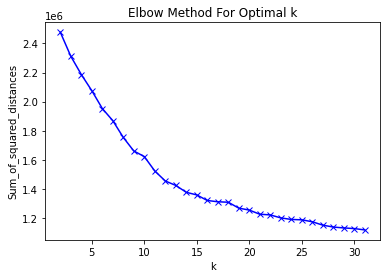

In [ ]:
ssq_pca = []
for k in K:
  ssq_pca.append(kmeans_pca[k].inertia_)
  display(new_df[f'clusters{k}'].value_counts())

plt.plot(K, ssq_pca, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()